In [76]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

In [36]:
df= pd.read_excel('Dataset.xlsx', index_col = False)

In [38]:
df

,Area,Bedroom,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     5 non-null      int64  
 1   Bedroom  4 non-null      float64
 2   Age      5 non-null      int64  
 3   Price    5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


In [14]:
df.notnull()

,Area,Bedroom,Age,Price
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,True,True,True,True
4,True,True,True,True


In [42]:
df.columns

Index(['Area', 'Bedroom', 'Age', 'Price'], dtype='object')

In [56]:
# Calculating median  (Imputation Method)
df.Bedroom.median()

3.5

In [58]:
# Converting float to integer value by using Math lib
median_bedrooms= math.floor(df.Bedroom.median())

In [60]:
median_bedrooms

3

In [62]:
# Filling the NaN with median_bedrooms value using fillna() function

df.Bedroom = df.Bedroom.fillna(median_bedrooms)

In [64]:
df

,Area,Bedroom,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [66]:
# Creating linear regression class object

reg= linear_model.LinearRegression()

In [70]:
#fitting data values into the model
# fit(x, y)
reg.fit(df[['Area', 'Bedroom', 'Age']], df.Price)

LinearRegression()

In [72]:
reg.coef_


array([   137.25, -26025.  ,  -6825.  ])

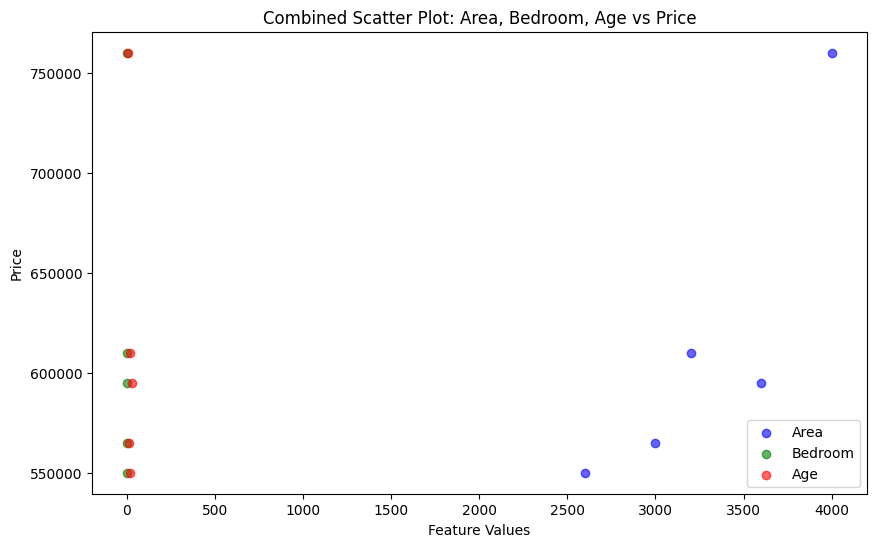

In [85]:
# Combined scatter plot for Area, Bedroom, and Age vs Price
plt.figure(figsize=(10, 6))
df_cleaned = df.dropna()
# Scatter plot for Area vs Price
plt.scatter(df_cleaned['Area'], df_cleaned['Price'], color='blue', alpha=0.6, label='Area')

# Scatter plot for Bedroom vs Price
plt.scatter(df_cleaned['Bedroom'], df_cleaned['Price'], color='green', alpha=0.6, label='Bedroom')

# Scatter plot for Age vs Price
plt.scatter(df_cleaned['Age'], df_cleaned['Price'], color='red', alpha=0.6, label='Age')

# Adding labels, title, and legend
plt.title('Combined Scatter Plot: Area, Bedroom, Age vs Price')
plt.xlabel('Feature Values')
plt.ylabel('Price')
plt.legend()
plt.show()


In [89]:
reg.predict([[3000,3, 40]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [91]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [95]:
137.25 * 3000 + (-26025) *3 + (-6825) *40 + 383724.99999999994

444399.99999999994

In [93]:
reg.intercept_

383724.99999999994

In [97]:
reg.predict([[2500, 4, 5]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [99]:
# Verifying predicted value
137.25 * 2500 + (-26025) *4 + (-6825) *5 + 383724.99999999994

588625.0